## Logistic Regression

### Source: 

https://www.kaggle.com/ronitf/heart-disease-uci

### Defining the Problem Statement 

This dataset records the attributes of a group of patients and whether they have heart disease. From this dataset, we would like to be able to predict the presence of heart disease in patients.

### Collecting the Data 

In [172]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import time

In [173]:
#Here is a case of Binary data
#drop the row with at least one element missing
#row with at least one element missing is for testing
df = pd.read_csv('heart.csv').dropna()
#change the column names to be a bit clearer and be easy to understand
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

 ### Modelling 

- Select all 13 features to be stored in X and 'target' feature in output Y. 'target' column indicates the presence of heart disease.
- Get the accuracy score

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:13]
y = df['target']

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 40)
x_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3


In [179]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state = 40)
start=time.time()
logReg.fit(x_train, y_train)
end = time.time()
print(end-start)

0.15162968635559082


In [161]:
y_pred = logReg.predict(x_test)

In [162]:
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 1 0]


In [163]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.881578947368421


Based on the obtained accuracy score of __0.88157__, the provided features are an efficient way to predict the presence of cardiovascular disease.

### Modelling Part 2

- Select individual features to be stored in X and 'target' feature in Y. 
- Get the accuracy scores for each model built on an individual feature.

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
name_list = []
accuracy = []
for name in df.columns:
    name_list.append(name)

y = df['target']
for cn in name_list:  
    x = df.iloc[:,name_list.index(cn):name_list.index(cn)+1]   
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=40)    
    logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state=40)
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(cn+"'s accuracy =",accuracy_score(y_test, y_pred))

age's accuracy = 0.618421052631579
sex's accuracy = 0.6447368421052632
chest_pain_type's accuracy = 0.7763157894736842
resting_blood_pressure's accuracy = 0.47368421052631576
cholesterol's accuracy = 0.5526315789473685
fasting_blood_sugar's accuracy = 0.5526315789473685
rest_ecg's accuracy = 0.6052631578947368
max_heart_rate_achieved's accuracy = 0.6842105263157895
exercise_induced_angina's accuracy = 0.7763157894736842
st_depression's accuracy = 0.7368421052631579
st_slope's accuracy = 0.7631578947368421
num_major_vessels's accuracy = 0.75
thalassemia's accuracy = 0.7763157894736842
target's accuracy = 1.0


In [165]:
# sort accuracy for each feature in reverse order
ls =np.stack((name_list, accuracy), axis=0)
xx = ls.T[np.lexsort(ls)].T
newls= np.stack((xx[0,][12::-1],xx[1,][12::-1]),axis=0)
newls.T

array([['thalassemia', '0.7763157894736842'],
       ['exercise_induced_angina', '0.7763157894736842'],
       ['chest_pain_type', '0.7763157894736842'],
       ['st_slope', '0.7631578947368421'],
       ['num_major_vessels', '0.75'],
       ['st_depression', '0.7368421052631579'],
       ['max_heart_rate_achieved', '0.6842105263157895'],
       ['sex', '0.6447368421052632'],
       ['age', '0.618421052631579'],
       ['rest_ecg', '0.6052631578947368'],
       ['fasting_blood_sugar', '0.5526315789473685'],
       ['cholesterol', '0.5526315789473685'],
       ['resting_blood_pressure', '0.47368421052631576']], dtype='<U32')

### Modelling Part 3

From the above list we are able to select the top 6 features to build the final model and calculate the accuracy score.

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.loc[:,['chest_pain_type','exercise_induced_angina','thalassemia','st_slope','st_depression','num_major_vessels']]
y = df['target']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 40)
x_train.head()

,chest_pain_type,exercise_induced_angina,thalassemia,st_slope,st_depression,num_major_vessels
151,0,0,2,1,1.6,0
292,0,1,1,1,2.8,2
289,0,1,3,1,2.0,1
0,3,0,1,0,2.3,0
209,0,1,3,2,0.0,1


In [168]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state = 40)
start=time.time()
logReg.fit(x_train, y_train)
end = time.time()
print(end-start)

0.0069980621337890625


In [169]:
y_pred = logReg.predict(x_test)

In [170]:
print(y_pred)

[1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 0]


In [171]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9078947368421053


### Conclusion 

With the top 5 features, we managed to get an accuracy score of __0.90789__ which is identical when all the 13 features were used. However, the computer run time taken with this is much shorter at __0.005990__ compared to __0.162077__ when all features were used. This would mean that the time taken to collect all the 13 features could be reduced. This would result in savings for both time and cost. 

### Scatter Diagram 

Here, we are using the feature with the highest accuracy to get the scatter diagram. 

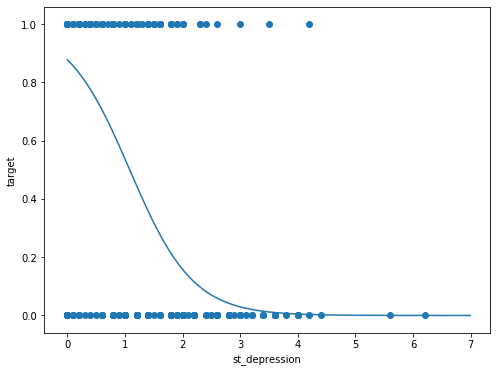

In [139]:
# We can visualize our model's sigmoid function
# to visualize the decision boundary, we  use the predicted probablity from our model
# our model will predict based on this curve
test_array = np.arange(0, 7, 0.01) # get a test array with x values from 0 to 7
test_prob = [] # the corresponding y values
# for each x value in the test array, we calculate what the probablity is given our model
for i in test_array:
    p_lost, p_win = logReg.predict_proba([[i,i,i,i,i,i]])[0]
    test_prob.append(p_win)
test_array = test_array.reshape(-1,1)
# plot the sigmoid function line
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(test_array, test_prob)
# plot the original data
ax.scatter(x['st_depression'], y)
ax.set(xlabel='st_depression', ylabel='target')
plt.show()